In [1]:
# Explore biosphric fluxes
# 1, net terrestrial exchange, from GEOS-Chem
# 2, balanced ecosystem uptake (near neutral), from GEOS-Chem
# 3, CASA 2016 ecosystem exchange, by Liang
# 4, compare them, annual total and seasonality
# 5, output CASA to match the format of GEOS-Chem

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from util.functions import area_latlon # grid area in km^2
from util.gamap_colormap import WhGrYlRd

In [4]:
# ocean exchange
#filename = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2014-09/OCEAN/Taka2009_CO2_Annual.nc'
filename = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2014-09/OCEAN/Taka2009_CO2_Monthly.nc'
ds_ocean = xr.open_dataset(filename)
lat_res = ds_ocean.attrs['Delta_Lat']
lon_res = ds_ocean.attrs['Delta_Lon']
varname = 'CO2'
unit    = ds_ocean[varname].attrs['units']
dr_ocean = ds_ocean[varname]
ds_ocean

<xarray.Dataset>
Dimensions:  (lat: 91, lon: 144, time: 12)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float32 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2000-12-01
Data variables:
    CO2      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.5.5 (http://code.zmaw.de/p...
    Conventions:  COARDS
    history:      Fri Aug 22 10:45:34 2014: cdo mulc,7.30654e-22 tmp.nc Taka2...
    Title:        COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-17+)
    Model:        GEOS4
    Delta_Lon:    2.5
    Delta_Lat:    2.0
    NLayers:      55
    Start_Date:   20000101
    Start_Time:   0
    End_Date:     20000101
    End_Time:     0
    Delta_Time:   0
    CDO:          Climate Data Operators version 1.5.5 (http://code.zmaw.de/p...

In [6]:

days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]


for ilat, lat in enumerate(dr_ocean.lat):
    for imonth in range(12):
        area_tmp = area_latlon(lat1 = lat, 
                                lon1 = dr_ocean.lon[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = dr_ocean.lon[10].values + lon_res)
        dr_ocean[imonth,ilat,:] = dr_ocean[imonth,ilat,:] * area_tmp * days_in_month[imonth] * 24 * 3600 *1e6  # unit: kgCO2/month
        #dr_ocean[0,ilat,:] = dr_ocean[0,ilat,:] * area_tmp * 24 *366 * 3600 *1e6  # unit: kgCO2/month
ocean_annual = dr_ocean.sum(dim = 'time')
total = dr_ocean.sum()       # kgCO2/year, same as data description
ann_total_ocean = total.values*1e-12*12/44  # GtC/yr
ann_total_ocean

-1.3727761098938183

In [18]:
# Ocean exchange, recommended flux
input_dir = '/geos/d21/GC_DATA/ExtData/HEMCO/CO2/v2015-04/OCEAN/'
filename = 'Scaled_Ocean_CO2_monthly.nc'
ds_ocean = xr.open_dataset(input_dir + filename)
lat_res = ds_ocean.attrs['Delta_Lat']
lon_res = ds_ocean.attrs['Delta_Lon']
dr_ocean = ds_ocean[varname][156:168,:,:] # 2013 monthly
ds_ocean

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 72, time: 168)
Coordinates:
  * lon      (lon) int32 -180 -175 -170 -165 -160 -155 ... 155 160 165 170 175
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2013-12-01
Data variables:
    CO2      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.5.6 (http://code.zmaw.de/p...
    Conventions:  COARDS
    Title:        COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-03+)
    Model:        GENERIC
    Delta_Lon:    5.0
    Delta_Lat:    4.0
    NLayers:      1
    Start_Date:   20000101
    Start_Time:   0
    End_Date:     20131201
    End_Time:     0
    Delta_Time:   0
    CDO:          Climate Data Operators version 1.5.6.1 (http://code.zmaw.de...
    history:      Fri Apr 17 11:06:19 2015: ncatted -a axis,time,o,c,T Scaled...

In [29]:
yearly_emi = []
year_vector = np.arange(2000,2014,1)

for iyear in range(1,15):
    #print(iyear)
    a = iyear*12
    dr_ocean = ds_ocean[varname][(a-12):a,:,:]
    
    for ilat, lat in enumerate(dr_ocean.lat):
        for imonth in range(12):
            area_tmp = area_latlon(lat1 = lat, 
                                    lon1 = dr_ocean.lon[10].values, 
                                    lat2 = lat + lat_res, 
                                    lon2 = dr_ocean.lon[10].values + lon_res)
            dr_ocean[imonth,ilat,:] = dr_ocean[imonth,ilat,:] * area_tmp * days_in_month[imonth] * 24 * 3600 *1e6  # unit: kgCO2/month
    ocean_annual = dr_ocean.sum(dim = 'time')
    total = dr_ocean.sum()       # kgCO2/year, same as data description
    ann_total_ocean = total.values*1e-12*12/44  # GtC/yr
    yearly_emi.append(ann_total_ocean)
    print(str(year_vector[iyear-1]) + ': ' + str(ann_total_ocean))

2000: -1.3604949018065455
2001: -1.373082389410909
2002: -1.4850918973440002
2003: -1.6496765292916364
2004: -1.7146515411316363
2005: -1.8132595328465455
2006: -1.91648759808
2007: -1.9906707277265454
2008: -2.0753863266676364
2009: -2.0964272433338182
2010: -2.2198890600261816
2011: -2.2909221720436364
2012: -2.3926688853643636
2013: -2.6416136489890905


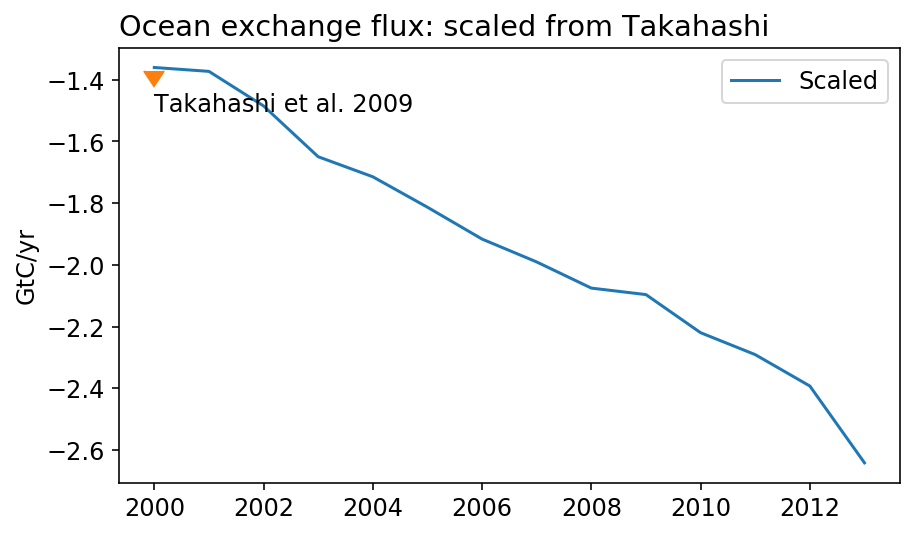

In [46]:
# plot of emission evolution for EU28, and future reduction plan

fig = plt.figure(figsize=[7, 4])
plt.title('Ocean exchange flux: scaled from Takahashi', loc='left')

plt.plot(year_vector, yearly_emi, label = 'Scaled')

plt.plot(2000, -1.373, marker=11, markersize=10)

plt.annotate('Takahashi et al. 2009', # this is the text
                 (2000,-1.373), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.ylabel('GtC/yr')
plt.legend()

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
fig.savefig(output_dir + '/ocean_fluxes.png', dpi = 300)

In [ ]:
# SIB seasonal cycles
months = np.arange('2016-01', '2017-02', dtype='datetime64[M]')
nh = []
nm = []
tr = [] 
sm = []  
sh = []

data = dr_liang.copy()

for i in range(12):
    nh.append(data.sel(lat = slice(60,90), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    nm.append(data.sel(lat = slice(30,60), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    tr.append(data.sel(lat = slice(-30,30), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    sm.append(data.sel(lat = slice(-60,-30), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    sh.append(data.sel(lat = slice(-90,-60), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)

casa_season = [nh,nm,tr,sm,sh]

In [ ]:
# plot 2 seasonal cycles
# plot all 4 fluxes together
fig, axes = plt.subplots(1, 2, 
                         figsize=[14, 6], 
                         subplot_kw={'projection': ccrs.PlateCarree()},
                         gridspec_kw={'hspace': 0.2, 'wspace': 0})
# CASA
format_total_liang = float("{0:.2f}".format(ann_total_C_liang))
gc_total_liang.plot(ax=axes[0],
                    vmax = 3e9,
                    add_labels = False,
                    cbar_kwargs={'shrink': 0.5})
axes[0].set_title('CASA 2016', loc='left')
axes[0].set_title(str(format_total_liang) + ' GtC', loc = 'right')
axes[0].coastlines()
axes[0].gridlines(linestyle = '--')

# SiB balanced ecosystem uptake
format_total_sib = float("{0:.2f}".format(ann_total_sib))
gc_total_sib.plot(ax=axes[1],
                  add_labels = False,     
                  vmax = 3e8,
                  label = 'kg/yr',
                  cbar_kwargs={'shrink': 0.5})
axes[1].set_title('SiB 2010', loc='left')
axes[1].set_title(str(format_total_sib) + ' GtC', loc = 'right')
axes[1].coastlines()
axes[1].gridlines(linestyle = '--')

fig.savefig(output_dir + '/casa_sib_annual.png', dpi = 300)

In [ ]:
# plot 2 seasonal cycles
fig, axes = plt.subplots(1, 2, figsize=[13, 4])

for i in range(5):
    axes[0].plot(range(1,13), casa_season[i], label = lab[i])
axes[0].set_ylabel('GtC/month')
axes[0].set_ylim(-0.4,0.4)
axes[0].legend()
axes[0].set_title('CASA 2016')

for i in range(5):
    axes[1].plot(range(1,13), sib_season[i], label = lab[i])
axes[1].set_ylabel('GtC/month')
axes[1].set_ylim(-2,2)
axes[1].legend()
axes[1].set_title('SiB 2010')

fig.savefig(output_dir + '/casa_sib_seasonal.png', dpi = 300)

In [ ]:
output.to_netcdf('/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2020-04/NEE.Liang.2016.nc')